In [87]:
import os
import math

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plot_styling
import pathlib
from scipy.misc import imread, toimage
from skimage.color import rgb2gray, gray2rgb

from dataset import ActionRecognitionDataSet
import beoid.filename_parser
from beoid.gaze import *
import visualisation

In [88]:
attention_maps = pd.read_pickle('attention-maps-ucf101-with-metadata.pickle')
dataset = ActionRecognitionDataSet('../generated/ucf101/test-1')

In [89]:
billiards = attention_maps.query('Clip == "v_Billiards_g06_c05"')
billiards_temporal = billiards.query('Network == "Temporal"')
billiards_temporal.head()

,Attention Map,Frame,Network,Clip,EBP Type,Window Size,Video,Action,Type
11780,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",1,Temporal,v_Billiards_g06_c05,Contrastive,10,06,Billiards,Temporal Contrastive
11781,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",2,Temporal,v_Billiards_g06_c05,Contrastive,10,06,Billiards,Temporal Contrastive
11782,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.97...",3,Temporal,v_Billiards_g06_c05,Contrastive,10,06,Billiards,Temporal Contrastive
11783,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",4,Temporal,v_Billiards_g06_c05,Contrastive,10,06,Billiards,Temporal Contrastive
11784,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",5,Temporal,v_Billiards_g06_c05,Contrastive,10,06,Billiards,Temporal Contrastive


In [90]:
dataset.get_frame("v_Billiards_g06_c05", 1)

'../generated/ucf101/test-1/frames/v_Billiards_g06_c05/frame000001.jpg'

In [91]:
billiards_output_dir_base = pathlib.Path('billiards')

def underlay_temporal_attention_map(dataset, attention_map_row, underlay_index=5):
    attention_map = attention_map_row['Attention Map']
    clip_name = attention_map_row['Clip']
    first_frame = attention_map_row['Frame']
    underlay_frame_id = first_frame + underlay_index
    underlay_frame = rgb2gray(imread(dataset.get_frame(clip_name, underlay_frame_id)))
    return visualisation.overlay_attention_map(underlay_frame, attention_map, cmap='hot')
    
attention_maps = billiards_temporal[billiards_temporal['EBP Type'] == 'Non-Contrastive']

for temporal_offset in [0, 5, 10]:
    for i, attention_map in attention_maps.iterrows():
        attention_map_image = toimage(underlay_temporal_attention_map(dataset, attention_map, temporal_offset))
        output_path = billiards_output_dir_base.joinpath('offset_{}'.format(temporal_offset), 
                                                         'frame{:06d}.jpg'.format(attention_map.Frame))
        output_path.parent.mkdir(exist_ok=True, parents=True)
        print("Saving ", output_path)
        attention_map_image.save(str(output_path))

Saving  billiards/offset_0/frame000001.jpg
Saving  billiards/offset_0/frame000002.jpg
Saving  billiards/offset_0/frame000003.jpg
Saving  billiards/offset_0/frame000004.jpg
Saving  billiards/offset_0/frame000005.jpg
Saving  billiards/offset_0/frame000006.jpg
Saving  billiards/offset_0/frame000007.jpg
Saving  billiards/offset_0/frame000008.jpg
Saving  billiards/offset_0/frame000009.jpg
Saving  billiards/offset_0/frame000010.jpg
Saving  billiards/offset_0/frame000011.jpg
Saving  billiards/offset_0/frame000012.jpg
Saving  billiards/offset_0/frame000013.jpg
Saving  billiards/offset_0/frame000014.jpg
Saving  billiards/offset_0/frame000015.jpg
Saving  billiards/offset_0/frame000016.jpg
Saving  billiards/offset_0/frame000017.jpg
Saving  billiards/offset_0/frame000018.jpg
Saving  billiards/offset_0/frame000019.jpg
Saving  billiards/offset_0/frame000020.jpg
Saving  billiards/offset_0/frame000021.jpg
Saving  billiards/offset_0/frame000022.jpg
Saving  billiards/offset_0/frame000023.jpg
Saving  bil

Saving  billiards/offset_0/frame000193.jpg
Saving  billiards/offset_0/frame000194.jpg
Saving  billiards/offset_0/frame000195.jpg
Saving  billiards/offset_0/frame000196.jpg
Saving  billiards/offset_0/frame000197.jpg
Saving  billiards/offset_0/frame000198.jpg
Saving  billiards/offset_0/frame000199.jpg
Saving  billiards/offset_0/frame000200.jpg
Saving  billiards/offset_0/frame000201.jpg
Saving  billiards/offset_0/frame000202.jpg
Saving  billiards/offset_0/frame000203.jpg
Saving  billiards/offset_0/frame000204.jpg
Saving  billiards/offset_0/frame000205.jpg
Saving  billiards/offset_0/frame000206.jpg
Saving  billiards/offset_0/frame000207.jpg
Saving  billiards/offset_0/frame000208.jpg
Saving  billiards/offset_0/frame000209.jpg
Saving  billiards/offset_0/frame000210.jpg
Saving  billiards/offset_0/frame000211.jpg
Saving  billiards/offset_0/frame000212.jpg
Saving  billiards/offset_0/frame000213.jpg
Saving  billiards/offset_0/frame000214.jpg
Saving  billiards/offset_0/frame000215.jpg
Saving  bil

Saving  billiards/offset_5/frame000134.jpg
Saving  billiards/offset_5/frame000135.jpg
Saving  billiards/offset_5/frame000136.jpg
Saving  billiards/offset_5/frame000137.jpg
Saving  billiards/offset_5/frame000138.jpg
Saving  billiards/offset_5/frame000139.jpg
Saving  billiards/offset_5/frame000140.jpg
Saving  billiards/offset_5/frame000141.jpg
Saving  billiards/offset_5/frame000142.jpg
Saving  billiards/offset_5/frame000143.jpg
Saving  billiards/offset_5/frame000144.jpg
Saving  billiards/offset_5/frame000145.jpg
Saving  billiards/offset_5/frame000146.jpg
Saving  billiards/offset_5/frame000147.jpg
Saving  billiards/offset_5/frame000148.jpg
Saving  billiards/offset_5/frame000149.jpg
Saving  billiards/offset_5/frame000150.jpg
Saving  billiards/offset_5/frame000151.jpg
Saving  billiards/offset_5/frame000152.jpg
Saving  billiards/offset_5/frame000153.jpg
Saving  billiards/offset_5/frame000154.jpg
Saving  billiards/offset_5/frame000155.jpg
Saving  billiards/offset_5/frame000156.jpg
Saving  bil

Saving  billiards/offset_10/frame000075.jpg
Saving  billiards/offset_10/frame000076.jpg
Saving  billiards/offset_10/frame000077.jpg
Saving  billiards/offset_10/frame000078.jpg
Saving  billiards/offset_10/frame000079.jpg
Saving  billiards/offset_10/frame000080.jpg
Saving  billiards/offset_10/frame000081.jpg
Saving  billiards/offset_10/frame000082.jpg
Saving  billiards/offset_10/frame000083.jpg
Saving  billiards/offset_10/frame000084.jpg
Saving  billiards/offset_10/frame000085.jpg
Saving  billiards/offset_10/frame000086.jpg
Saving  billiards/offset_10/frame000087.jpg
Saving  billiards/offset_10/frame000088.jpg
Saving  billiards/offset_10/frame000089.jpg
Saving  billiards/offset_10/frame000090.jpg
Saving  billiards/offset_10/frame000091.jpg
Saving  billiards/offset_10/frame000092.jpg
Saving  billiards/offset_10/frame000093.jpg
Saving  billiards/offset_10/frame000094.jpg
Saving  billiards/offset_10/frame000095.jpg
Saving  billiards/offset_10/frame000096.jpg
Saving  billiards/offset_10/fram

In [102]:
imread(dataset.get_frame(attention_map.Clip, 1)).shape

(256, 340, 3)

Saving billiards/attention_maps/frame000001.jpg
Saving billiards/attention_maps/frame000002.jpg
Saving billiards/attention_maps/frame000003.jpg
Saving billiards/attention_maps/frame000004.jpg
Saving billiards/attention_maps/frame000005.jpg
Saving billiards/attention_maps/frame000006.jpg
Saving billiards/attention_maps/frame000007.jpg
Saving billiards/attention_maps/frame000008.jpg
Saving billiards/attention_maps/frame000009.jpg
Saving billiards/attention_maps/frame000010.jpg
Saving billiards/attention_maps/frame000011.jpg
Saving billiards/attention_maps/frame000012.jpg
Saving billiards/attention_maps/frame000013.jpg
Saving billiards/attention_maps/frame000014.jpg
Saving billiards/attention_maps/frame000015.jpg
Saving billiards/attention_maps/frame000016.jpg
Saving billiards/attention_maps/frame000017.jpg
Saving billiards/attention_maps/frame000018.jpg
Saving billiards/attention_maps/frame000019.jpg
Saving billiards/attention_maps/frame000020.jpg
Saving billiards/attention_maps/frame000

Saving billiards/attention_maps/frame000181.jpg
Saving billiards/attention_maps/frame000182.jpg
Saving billiards/attention_maps/frame000183.jpg
Saving billiards/attention_maps/frame000184.jpg
Saving billiards/attention_maps/frame000185.jpg
Saving billiards/attention_maps/frame000186.jpg
Saving billiards/attention_maps/frame000187.jpg
Saving billiards/attention_maps/frame000188.jpg
Saving billiards/attention_maps/frame000189.jpg
Saving billiards/attention_maps/frame000190.jpg
Saving billiards/attention_maps/frame000191.jpg
Saving billiards/attention_maps/frame000192.jpg
Saving billiards/attention_maps/frame000193.jpg
Saving billiards/attention_maps/frame000194.jpg
Saving billiards/attention_maps/frame000195.jpg
Saving billiards/attention_maps/frame000196.jpg
Saving billiards/attention_maps/frame000197.jpg
Saving billiards/attention_maps/frame000198.jpg
Saving billiards/attention_maps/frame000199.jpg
Saving billiards/attention_maps/frame000200.jpg
Saving billiards/attention_maps/frame000

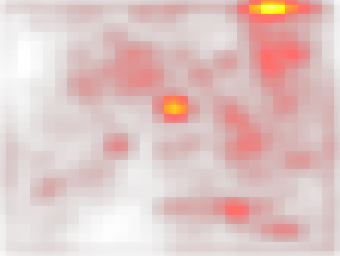

In [129]:
from skimage.novice import Picture
image_size = (256, 340, 3)
white_underlay = np.ones(image_size)
for i, attention_map_row in attention_maps.iterrows():
    attention_map_image = toimage(visualisation.overlay_attention_map(white_underlay, attention_map_row['Attention Map'], cmap='hot'))
    output_path = billiards_output_dir_base.joinpath('attention_maps', 'frame{:06d}.jpg'.format(attention_map_row.Frame))
    output_path.parent.mkdir(exist_ok=True, parents=True)
    print("Saving {}".format(output_path))
    attention_map_image.save(str(output_path))

attention_map_image